In [0]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

h_1 = Dense(3*encoding_dim, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(1*encoding_dim, activation='relu')(h_1)
h_2 = Dense(3*encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(h_2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

In [0]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [28]:
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
decoded_imgs = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.4944 - acc: 0.4578 - val_loss: 0.4003 - val_acc: 0.4891
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3812 - acc: 0.4920 - val_loss: 0.3705 - val_acc: 0.4951
Epoch 3/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3610 - acc: 0.4959 - val_loss: 0.3540 - val_acc: 0.4988
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3472 - acc: 0.4985 - val_loss: 0.3437 - val_acc: 0.4944
Epoch 5/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.3375 - acc: 0.5002 - val_loss: 0.3343 - val_acc: 0.5014


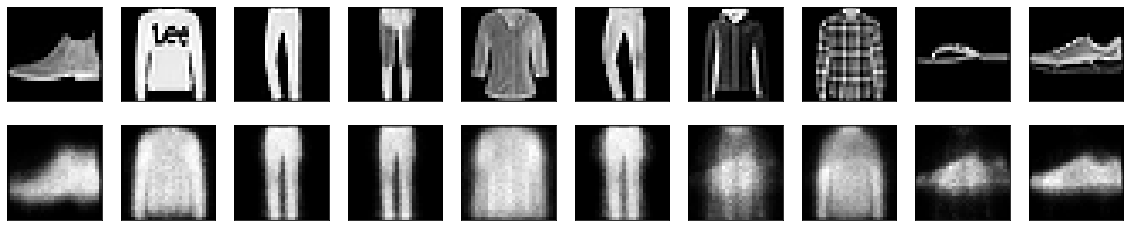

In [25]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

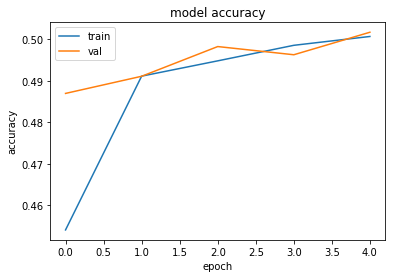

In [19]:
# Accuracy plot for train and validation datasets
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show() 

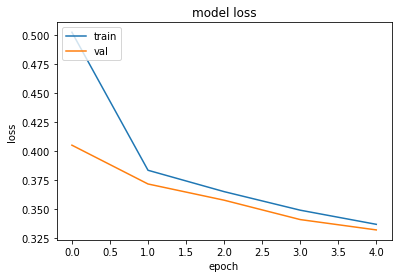

In [20]:
# Loss plot for train and validation datasets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()